In [112]:
import pandas as pd
import numpy as np

In [113]:
dataset = pd.read_csv("dataset/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition/ObesityDataSet_raw_and_data_sinthetic.csv")
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [114]:
x = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,-1].values

print(x)
print()
print(y)

[['Female' 21.0 1.62 ... 1.0 'no' 'Public_Transportation']
 ['Female' 21.0 1.52 ... 0.0 'Sometimes' 'Public_Transportation']
 ['Male' 23.0 1.8 ... 1.0 'Frequently' 'Public_Transportation']
 ...
 ['Female' 22.524036 1.752206 ... 0.646288 'Sometimes'
  'Public_Transportation']
 ['Female' 24.361936 1.73945 ... 0.586035 'Sometimes'
  'Public_Transportation']
 ['Female' 23.664709 1.738836 ... 0.714137 'Sometimes'
  'Public_Transportation']]

['Normal_Weight' 'Normal_Weight' 'Normal_Weight' ... 'Obesity_Type_III'
 'Obesity_Type_III' 'Obesity_Type_III']


In [115]:
dataset["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [120]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
x[:,4] = label.fit_transform(x[:,4]) # label encoding for family history with over weight 
x[:,5] = label.fit_transform(x[:,5]) # label encoding for FAVC
x[:,0] = label.fit_transform(x[:,0]) # label ecnoding for gender
x[:,8] = label.fit_transform(x[:,8]) # label encoding for CAEC
x[:,9] = label.fit_transform(x[:,9]) # label encoding for smoking
x[:,11] = label.fit_transform(x[:,11]) # label encoding for SCC
x[:,14] = label.fit_transform(x[:,14]) # label encoding for CALC 
x[:,15] = label.fit_transform(x[:,15]) # label encoding for MTRANS 


In [121]:
print(x)

[[0 21.0 1.62 ... 1.0 3 3]
 [0 21.0 1.52 ... 0.0 2 3]
 [1 23.0 1.8 ... 1.0 1 3]
 ...
 [0 22.524036 1.752206 ... 0.646288 2 3]
 [0 24.361936 1.73945 ... 0.586035 2 3]
 [0 23.664709 1.738836 ... 0.714137 2 3]]


In [122]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size= 0.2,random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100,criterion='gini',random_state = 0)
# yTrain = yTrain.ravel()

classifier.fit(xTrain,yTrain)

In [ ]:
yPredict = classifier.predict(xTest)
print(yPredict)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt 

cm = confusion_matrix(yTest,yPredict)

disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot()
plt.show()

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)


accuracies= cross_val_score(estimator = classifier, X = xTrain, y = yTrain, cv = cv)
print("\nn_estimators:")
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
from sklearn.metrics import precision_score, recall_score,r2_score,f1_score

precision = precision_score(yTest,yPredict, average="weighted")
recall = recall_score(yTest,yPredict,average="weighted")
f1Score = f1_score(yTest,yPredict,average="weighted")
# report = classification_report(yTest,yPredict)

print("precision: ",precision)
print("recall: ",recall)
print("f1_score: ",f1Score)
# print("\nClassification Report: \n",report)

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)


accuracies= cross_val_score(estimator = classifier, X = xTrain, y = yTrain, cv = cv)
print("\nn_estimators:")
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters =  [{'n_estimators': [100, 200, 300, 400], 'criterion': ['gini']}, 
{'n_estimators': [100, 200, 300, 400], 'criterion': ['entropy']},{'n_estimators': [100, 200, 300, 400], 'criterion': ['log_loss']}]

gridSearch = GridSearchCV(classifier, param_grid=parameters, scoring = "accuracy", cv = 10, n_jobs=-1)

gridSearch = gridSearch.fit(xTrain,yTrain)

In [ ]:
bestAccuracy=gridSearch.best_score_

bestParameters = gridSearch.best_params_

print("Best Accuracy: {:.2f} %".format(bestAccuracy*100))
print("Best Parameters:", bestParameters)

In [124]:
from sklearn.svm import SVC
classifierSVC = SVC(kernel= "linear",C=100, random_state=0)
classifierSVC.fit(xTrain,yTrain)

SVC(C=100, kernel='linear', random_state=0)

In [125]:
yPredictSVC = classifierSVC.predict(xTest)
print(yPredictSVC)

['Obesity_Type_II' 'Obesity_Type_I' 'Overweight_Level_II'
 'Obesity_Type_III' 'Obesity_Type_III' 'Obesity_Type_II'
 'Insufficient_Weight' 'Obesity_Type_III' 'Obesity_Type_I'
 'Obesity_Type_II' 'Obesity_Type_III' 'Obesity_Type_I'
 'Overweight_Level_I' 'Obesity_Type_I' 'Normal_Weight' 'Obesity_Type_I'
 'Normal_Weight' 'Obesity_Type_III' 'Overweight_Level_II'
 'Overweight_Level_II' 'Obesity_Type_III' 'Obesity_Type_I'
 'Obesity_Type_I' 'Overweight_Level_II' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_II' 'Overweight_Level_I'
 'Obesity_Type_II' 'Overweight_Level_I' 'Overweight_Level_II'
 'Overweight_Level_II' 'Obesity_Type_I' 'Obesity_Type_II'
 'Overweight_Level_I' 'Overweight_Level_II' 'Insufficient_Weight'
 'Overweight_Level_I' 'Insufficient_Weight' 'Overweight_Level_I'
 'Overweight_Level_II' 'Insufficient_Weight' 'Overweight_Level_I'
 'Obesity_Type_III' 'Obesity_Type_II' 'Obesity_Type_I'
 'Insufficient_Weight' 'Obesity_Type_III' 'Insufficient_Weight'
 'Overwe

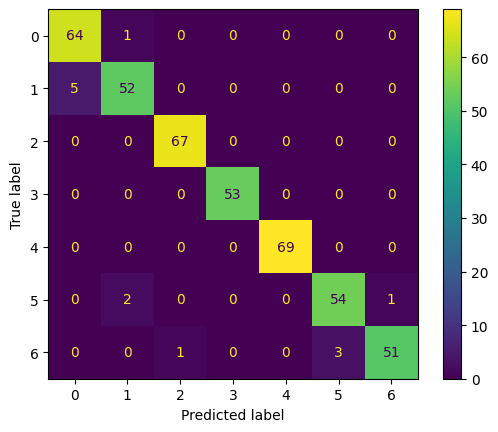

In [127]:
cm1 = confusion_matrix(yTest,yPredictSVC)

disp = ConfusionMatrixDisplay(confusion_matrix= cm1)
disp.plot()
plt.show()

In [126]:
from sklearn.metrics import precision_score, recall_score,r2_score,f1_score

precision = precision_score(yTest,yPredictSVC, average="weighted")
recall = recall_score(yTest,yPredictSVC,average="weighted")
f1Score = f1_score(yTest,yPredictSVC,average="weighted")
# report = classification_report(yTest,yPredict)

print("precision: ",precision)
print("recall: ",recall)
print("f1_score: ",f1Score)
# print("\nClassification Report: \n",report)

precision:  0.969592855172656
recall:  0.9692671394799054
f1_score:  0.9691530352556434


In [ ]:
from sklearn.model_selection import GridSearchCV

parametersSVC =  [{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, 
{'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

gridSearch = GridSearchCV(classifierSVC, param_grid=parametersSVC, scoring = "accuracy", cv = 10, n_jobs=-1)

gridSearch = gridSearch.fit(xTrain,yTrain)

In [128]:
bestAccuracy=gridSearch.best_score_

bestParameters = gridSearch.best_params_

print("Best Accuracy: {:.2f} %".format(bestAccuracy*100))
print("Best Parameters:", bestParameters)

NameError: name 'gridSearch' is not defined